In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data

The data for this analysis is from a direct marketing campaign from a Portguese Banks. Clients were called and offered a term deposit product.

Link: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [79]:
#Import Data
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [80]:
#There are 41,188 rows and 21 columns.
data.shape

(41188, 21)

In [81]:
# See column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [82]:
#See first 5 rows of data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [83]:
#Descriptive statistics for the numerical columns
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [85]:
#Count values for outcome.
outcome = data["y"]
outcome.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

There does appear to be a class imblanace issue, but there are more than 10% of the minority class so we can proceed at this point and revisit if there is an issue during modeling.

In [86]:
bank_data = data.loc[:,"age":"poutcome"]

UCI provided two data sets, one with bank only information, and a second including macroeconomic information.  This analysis will be performed on the full dataset, but for looking at correlation a separate set of data will be created with bank information only.

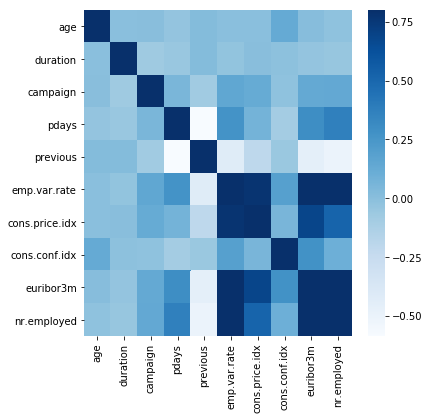

In [69]:
full_corrmat = data.corr()

f, ax =plt.subplots(figsize=(6,6))
sns.heatmap(full_corrmat,vmax=.8, cmap="Blues")

We observe high correlation for the macroeconomic factors which is to be expected.

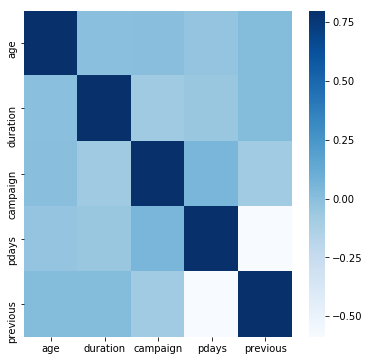

In [72]:
bank_corrmat = bank_data.corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(bank_corrmat,vmax=.8, cmap="Blues")

Looking only at a dataset with the bank information there doesn't appear to be any correlations we should be concerned about at this point.  Now we can start to dig in to the data, looking first at a boxplot of the ages of customers.

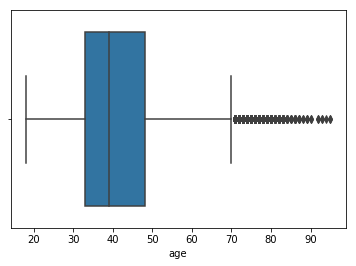

In [32]:
sns.boxplot(x="age", data=data)

It looks like the lower range is just below twenty and there are several outlies above 70.  The median customer is just below 40 years old.  Now let's look at the education levels of customers.

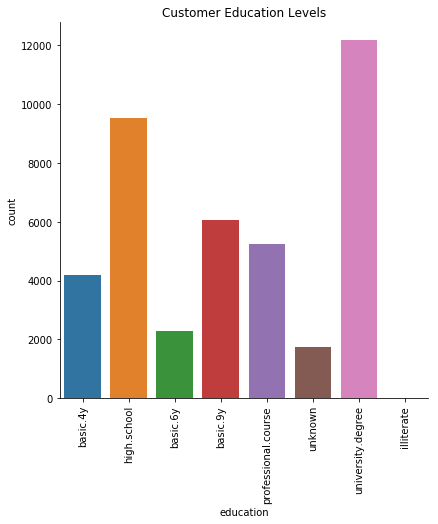

In [93]:
sns.factorplot(x="education", data=data, kind="count", size=6)
plt.title("Customer Education Levels")
plt.xticks(rotation=90)
plt.show()

The education level with the most customers is University, followed by High School, then basic.9y.  The material provided by UCI doesn't go in to detail as to what the basic.#y format for education means.  A quick Google search shows a reference to 4th and 6th grades being important markers in Portugese education.  If needed this may be researched further if education becomes an important feature.

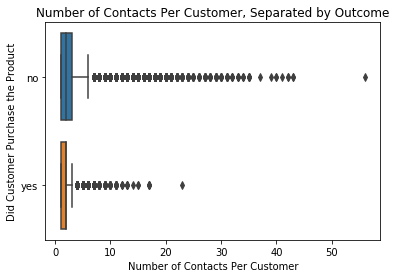

In [99]:
sns.boxplot(x="campaign", y="y", data=data)
plt.title("Number of Contacts Per Customer, Separated by Outcome")
plt.ylabel("Did Customer Purchase the Product")
plt.xlabel("Number of Contacts Per Customer")
plt.show()

It looks like most customers have just a handful of contacts, whether they purchase the product or not.  But there are some outliers, including one with more than 50 contacts for a customer that did not purchase the product, and more than 20 for one that did. Let's filter out those with more than 10 contacts so we get a better idea.

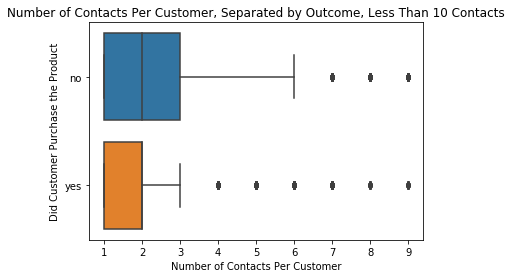

In [105]:
campaign_less_than_10 = data.loc[data["campaign"] <10]
sns.boxplot(x="campaign", y="y", data=campaign_less_than_10)
plt.title("Number of Contacts Per Customer, Separated by Outcome, Less Than 10 Contacts")
plt.ylabel("Did Customer Purchase the Product")
plt.xlabel("Number of Contacts Per Customer")
plt.show()

It looks like most customers who purchase are contacted less than two times.  Let's look at how many days it's been since each customer has been contacted prior to this campaign.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011C28D6E1D0>]], dtype=object)

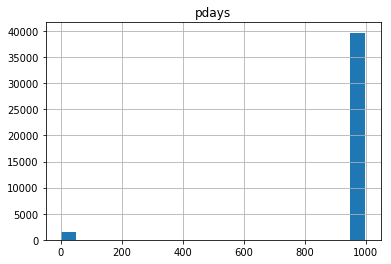

In [116]:
data.hist(column="pdays", bins=20)

For customers who haven't been previously contacted they are coded as 999, so most customers have not been previously contacted in a marketing campaign.  For those that have been previously contacted let's see how many days it's been since they've been previously contacted.

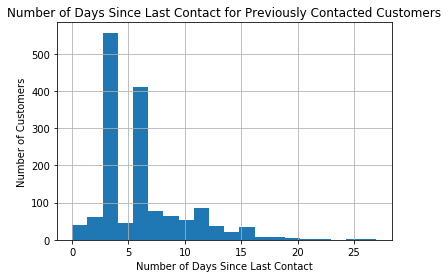

In [121]:
pdays_less_than_999 = data.loc[data["pdays"]<999]
pdays_less_than_999.hist(column="pdays", bins=20)
plt.title("Number of Days Since Last Contact for Previously Contacted Customers")
plt.xlabel("Number of Days Since Last Contact")
plt.ylabel("Number of Customers")
plt.show()

Let's now look at how likely those customers were to purhase this time.

Text(-2.45,0.5,'Number of Customers')

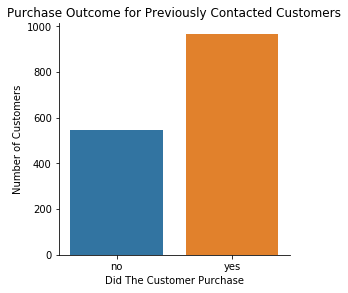

In [127]:
sns.factorplot(x="y", data=pdays_less_than_999, kind="count", size=4)
plt.title("Purchase Outcome for Previously Contacted Customers")
plt.xlabel("Did The Customer Purchase")
plt.ylabel("Number of Customers")

Contact previously contacted customers appeared to work, most of the customers who had previously been contacted made a purchase during this campaign.  There are several other pieces of information about the customer's, let's see how they impact whether they purchased the product or not.  First we'll look at whether the customer has defaulted on a loan previously.  The data doesn't make it clear whether the default was with this bank.

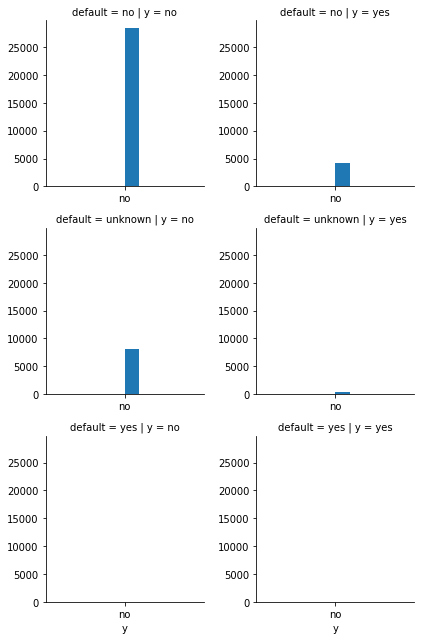

In [140]:
g=sns.FacetGrid(data, col="y", row="default")
g.map(plt.hist,"y")
plt.show()

It looks like no customers with known defaults were contacted. And for those with an unknown default status the conversion rate was lower than for those with a confirmed no.  Let's confirm this with raw numbers.

In [145]:
default_data = data["default"]
default_data.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

The numbers confirm that there were only 3 customers with a known default, "yes", contacted during the campaign, clearly they are trying to avoid those customers.  Let's look at anothet categorical piece of information on the customers and how it impacts whether they make a purchase or not.

In [ ]:
g=sns.FacetGrid(data, col="y", row="default")
g.map(plt.hist,"y")
plt.show()

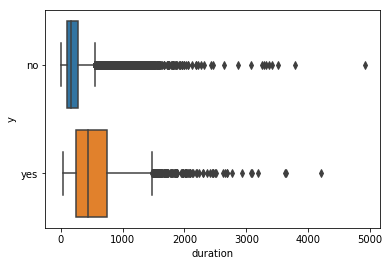

In [78]:
sns.boxplot(x="duration", y="y", data=data)

In [ ]:
sns.boxplot(x="campaign", y="y", data=data)

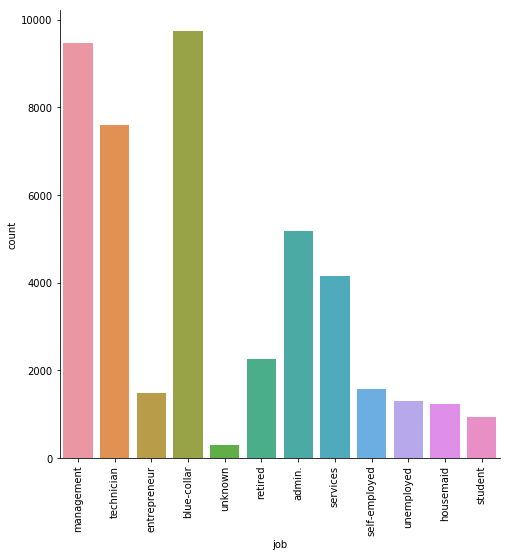

In [41]:
sns.factorplot(x="job", data=data, kind="count", size=7)
plt.xticks(rotation=90)
plt.show()